# se2dr Fig 7 plot compound

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time


sys.path.insert(0,"/home/nico/Tools/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from se2waveload import *
from Lib_GeneralFunctions import *
from GeneratePaperFigs import *
from ModelIllustration import *

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [3]:
xx = np.linspace(-1.e4, 1.e4, 6001)

HorizontalZeroSDF = ZeroLevelSet(xx,Tiltfunc(xx, theta = 0), Tiltfunc_der(xx, theta = 0), "Horizontal SDF")
TiltedZeroSDF     = ZeroLevelSet(xx,Tiltfunc(xx, theta = 20*np.pi/180), Tiltfunc_der(xx, theta = 20*np.pi/180), "Tilted 20deg SDF")
SigmZeroSDF       = ZeroLevelSet(xx,func(xx),func_der(xx), "Sigmoid SDF")


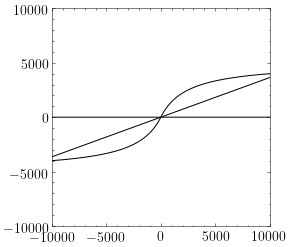

In [4]:
HorizontalZeroSDF.PlotZeroLevelSet()
TiltedZeroSDF.PlotZeroLevelSet()
SigmZeroSDF.PlotZeroLevelSet()

plt.xlim([-10000,10000])
plt.ylim([-10000,10000])
plt.gca().set_aspect('equal', adjustable='box')

# Colormap selection

In [5]:
from palettable.colorbrewer.diverging import PuOr_10_r as FieldColor

cmap = FieldColor.mpl_colormap

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_5 as LineColor

cmapProf = ListedColormap(LineColor.mpl_colors[:])

# Figure 7, Tilted TPV3

In [6]:
start_time = time.time()
fname = "step-{timestep:04}_wavefield.pbin"
path = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/DeltaSweepVx/TEAR4_TPV_T20_P1_010x010_d{}.001/"

Frames = [ 1000, 6500,12000]
PathPost = ['2','4','6']

ZoomIn = [3000,6000,10000]

In [7]:
def PlotVelSweep(fname,path,Frames,PathPost,ZoomIn,**kwargs):  

    fig = plt.figure(figsize = (9, 19),dpi=300) #constrained_layout=True
    gs = fig.add_gridspec(3, 1, wspace=0,hspace=0.12)

    for i,gsSet in enumerate(gs):
        gsSet = gsSet.subgridspec(2, 3, wspace=0,hspace=0.)

        ax0_00 = fig.add_subplot(gsSet[0,0])
        ax0_01 = fig.add_subplot(gsSet[1,0])
        ax0_10 = fig.add_subplot(gsSet[0:2, 1:])
        ax0_10.yaxis.tick_right()

        ax0_00.set_xticklabels([])
        ax0_00.set_yticklabels([])
        ax0_01.set_xticklabels([])
        ax0_01.set_yticklabels([])
        
        FormatAxNormal(ax0_00)
        FormatAxNormal(ax0_01)
        FormatAxNormal(ax0_10)
        
        
        ######## Load the necessary files for Ax0_10
        MeshFilename = os.path.join(path.format(PathPost[1]), "default_mesh_coor.pbin")
        se2_coor = se2wave_load_coordinates(MeshFilename)
        FieldFilename = os.path.join(path.format(PathPost[1]),fname.format(timestep=Frames[i]))
        TimeStepVal, CoorX, CoorY, FieldX, FieldY, FieldvelX, FieldvelY =  ExtractFields(FieldFilename, se2_coor)
        MeshFilename = os.path.join(path, "default_mesh_coor.pbin")

        img3 = ax0_10.pcolormesh(CoorX, CoorY, FieldvelX,**kwargs)
        
        # Colorbar
        cbaxes = inset_axes(ax0_10, width="40%",height="4%",loc=3, borderpad=2)
        plt.colorbar(img3,cax=cbaxes,orientation="horizontal", label=r"V$_{x}$ [m/s]")
        cbaxes.xaxis.set_label_position('top')
        
        # Timestamp
        ax0_10.annotate(text="T:{0:.2f}s".format(TimeStepVal),xy=[0.05,0.9], xycoords= "axes fraction")
        
        # Stamp for fault zone thickness
        ax0_10.annotate(text="$\delta={}h$".format(PathPost[1]),xy=[0.8,0.05], xycoords= "axes fraction")
        
        
        # Get the values to normalize the rest of the subset of plots
        Vmax  = FieldvelX.max()
        Vmin  = FieldvelX.min()
        
        
        ######## Load the necessary files for Ax0_00
        MeshFilename = os.path.join(path.format(PathPost[0]), "default_mesh_coor.pbin")
        se2_coor = se2wave_load_coordinates(MeshFilename)
        FieldFilename = os.path.join(path.format(PathPost[0]),fname.format(timestep=Frames[i]))
        TimeStepVal, CoorX, CoorY, FieldX, FieldY, FieldvelX, FieldvelY =  ExtractFields(FieldFilename, se2_coor)
        MeshFilename = os.path.join(path, "default_mesh_coor.pbin")

        img1 = ax0_00.pcolormesh(CoorX, CoorY, FieldvelX, vmax = Vmax, vmin = Vmin, **kwargs)
        
        # Stamp for fault zone thickness
        ax0_00.annotate(text="$\delta={}h$".format(PathPost[0]),xy=[0.7,0.1], xycoords= "axes fraction")

        ######## Load the necessary files for Ax0_01
        MeshFilename = os.path.join(path.format(PathPost[2]), "default_mesh_coor.pbin")
        se2_coor = se2wave_load_coordinates(MeshFilename)
        FieldFilename = os.path.join(path.format(PathPost[2]),fname.format(timestep=Frames[i]))
        TimeStepVal, CoorX, CoorY, FieldX, FieldY, FieldvelX, FieldvelY =  ExtractFields(FieldFilename, se2_coor)
        MeshFilename = os.path.join(path, "default_mesh_coor.pbin")

        img2 = ax0_01.pcolormesh(CoorX, CoorY, FieldvelX, vmax = Vmax, vmin = Vmin,**kwargs)
        
        # Stamp for fault zone thickness
        ax0_01.annotate(text="$\delta={}h$".format(PathPost[2]),xy=[0.7,0.1], xycoords= "axes fraction")

        
        
        
        ax0_10.set_xlim([-ZoomIn[i],ZoomIn[i]])
        ax0_00.set_xlim([-ZoomIn[i],ZoomIn[i]])
        ax0_01.set_xlim([-ZoomIn[i],ZoomIn[i]])
        ax0_10.set_ylim([-ZoomIn[i],ZoomIn[i]])
        ax0_00.set_ylim([-ZoomIn[i],ZoomIn[i]])
        ax0_01.set_ylim([-ZoomIn[i],ZoomIn[i]])
    

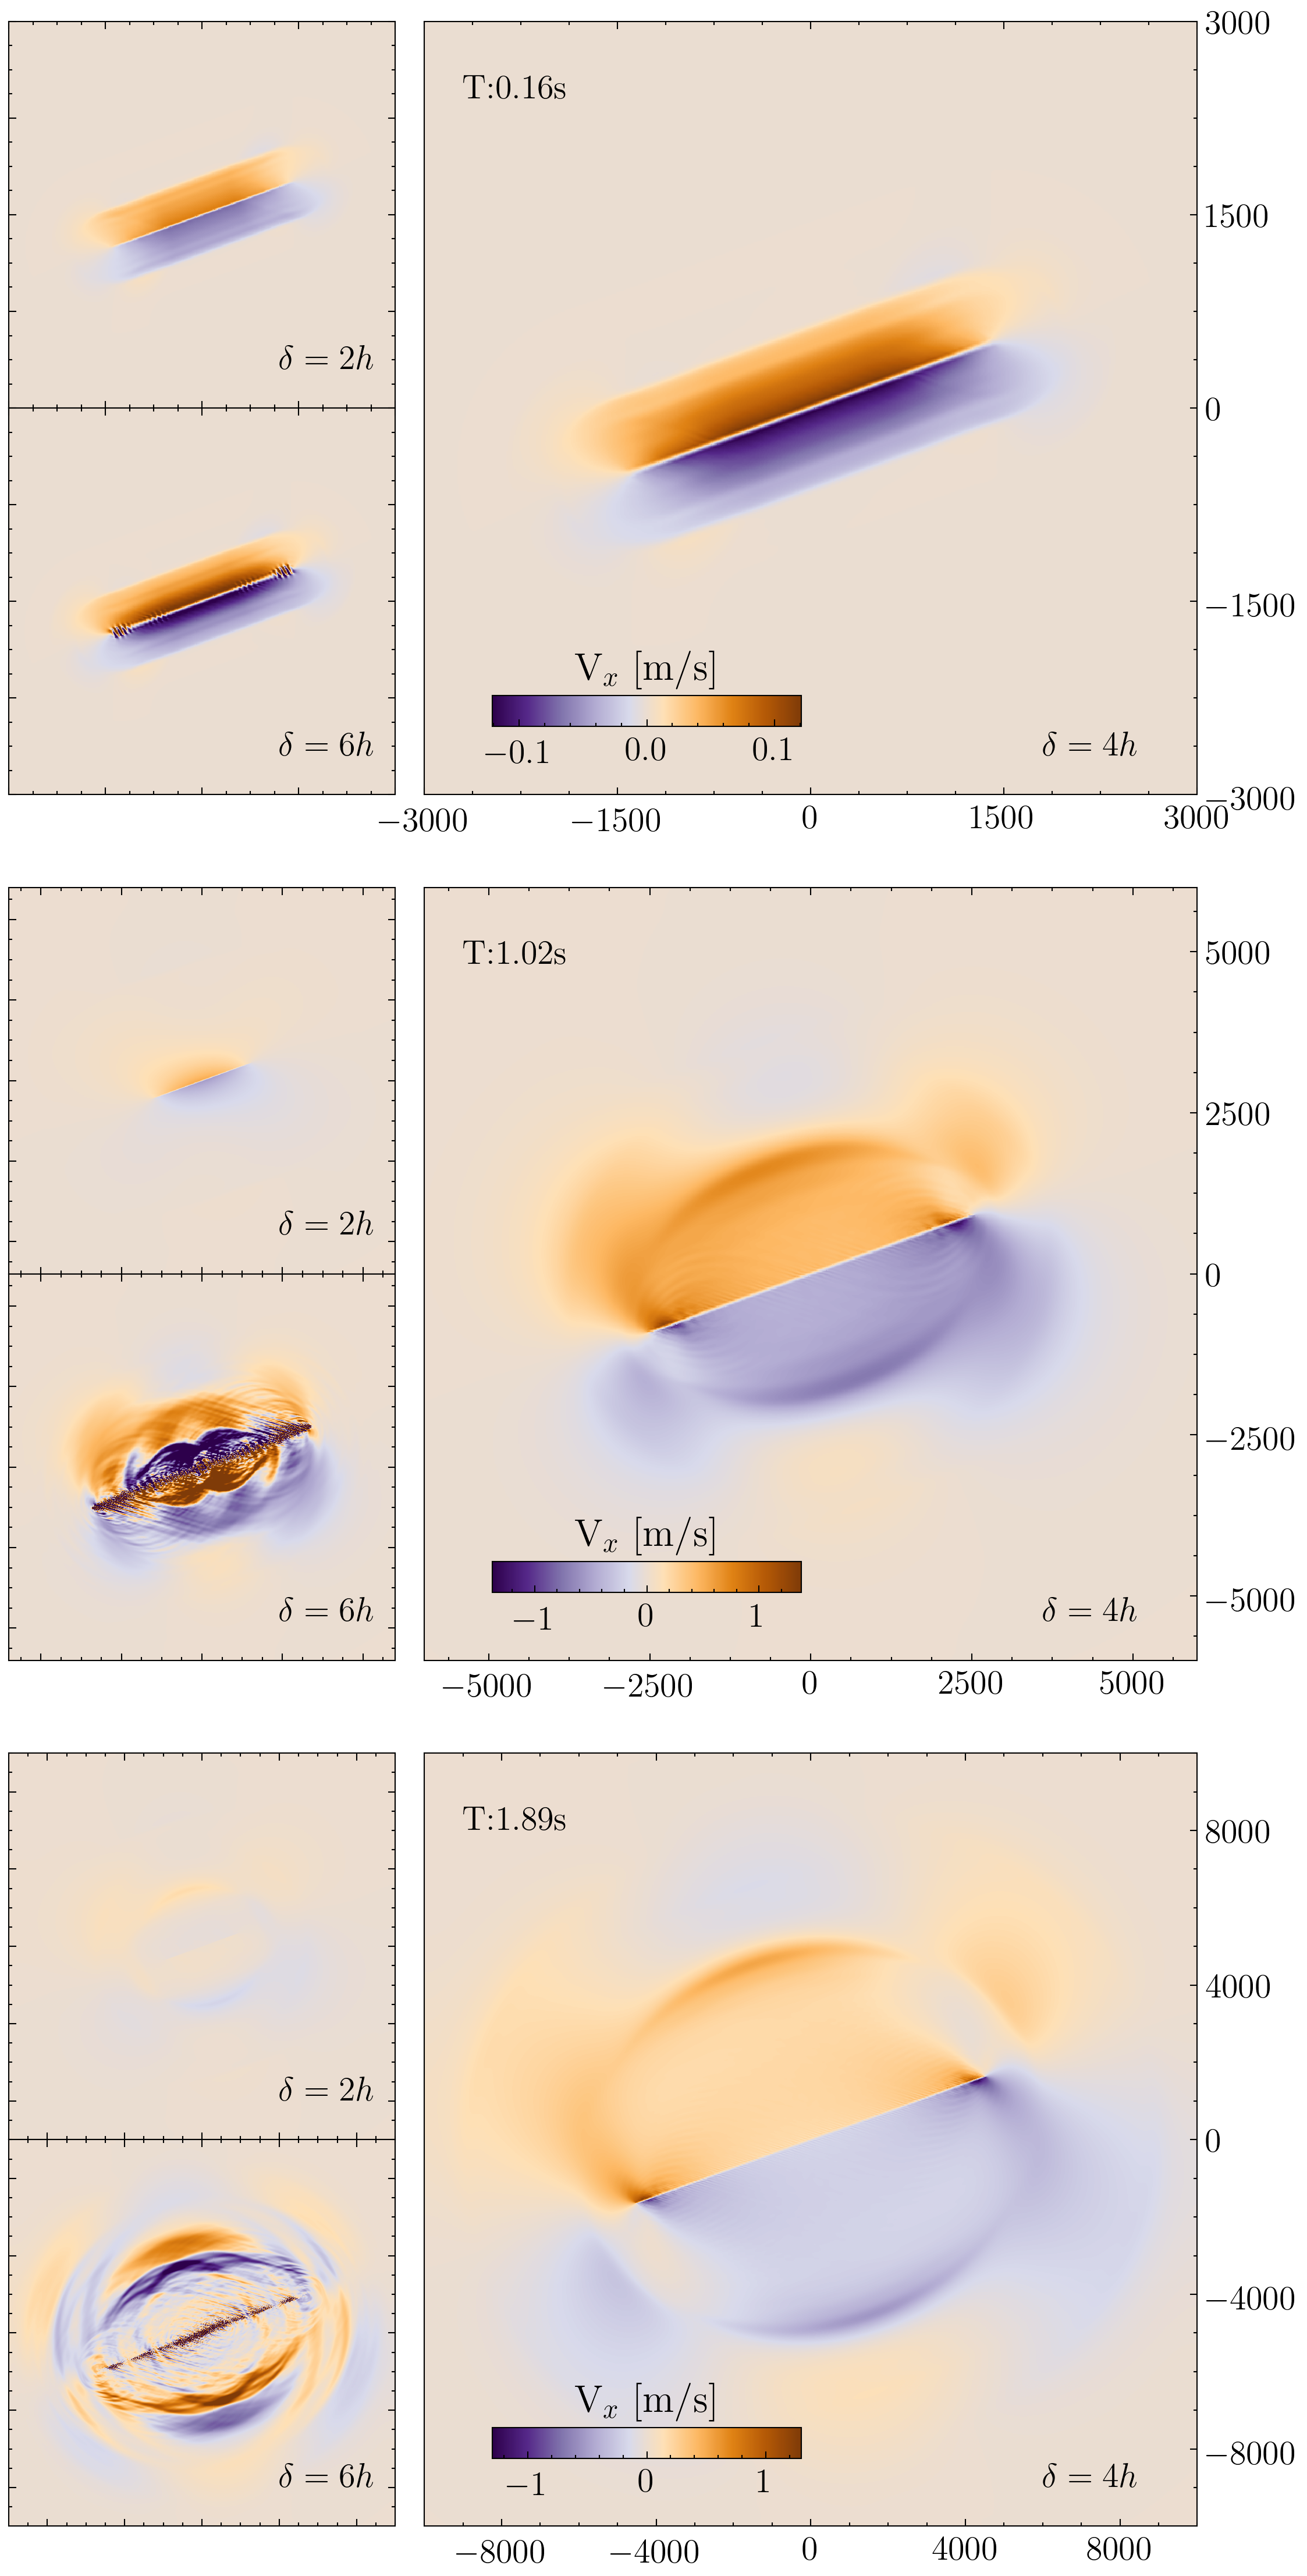

In [8]:
PlotVelSweep(fname,path,Frames,PathPost,ZoomIn,cmap=cmap)